#### <b>Pós Graduação em Data Science</b>
##### Disciplina de Machine Learning: projecto final individual "Bank Marketing Campaign Dataset"

##### Trabalho realizado por:    
    Jorge Gomes      ( jorge_gomes98@hotmail.com )   
    
##### Formador:
    Filipa Rodrigues ( https://www.linkedin.com/in/filipacrodrigues/ )
    
##### Data Realização:
    2019-12-08

### O trabalho deve ser executado passo a passo pelo facto de em determinada altura ter processos que demoram bastante tempo a processar e ficaria horas ocupado.

### O projecto divide-se praticamente em cinco partes:
    1) Análise, tratamento e transformação dos dados: remoção de variáveis, outliers, transformação de variáveis categóricas em numéricas, etc
    2) Criação de uma Baseline da campanha imaginando que todos as pessoas acederiam à mesma
    3) Procura dos melhores hiper-parâmetros dos diversos modelos a testar (é aqui que o processamento pode demorar horas!)
    4) Criação dos modelos de machine learning, com os hiper-parâmetros recolhidos anteriormente
    5) Análise dos resultados de todos os modelos testados e selecção do melhor, o que dará menor custo à campanha. Verificação das melhores features a usar no modelo.
    
### As respostas às questões estão reunidas no final

# Final Project - The Rumos Bank Marketing Campaign


Depois do vosso sucesso no primeiro projecto no The Rumos Bank, surge um novo projecto ainda mais empolgante! 

A equipa de marketing quer lançar uma nova campanha cujo objetivo é convencer os clientes a abrir depósitos a prazo.

Até agora a estratégia era ligar ao máximo número de pessoas, de forma indiscriminada, e tentar vender-lhe o produto. No entanto essa abordagem, para além de gastar mais recursos porque implica ter várias pessoas a ligar a todos os clientes, também é incomóda para alguns clientes que não gostam de ser incomodados com esse tipo de chamadas. Feitas as contas, chegou-se à conclusão que:

    - Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    - Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.
    
Com base nesta informação, conseguem ajudar a equipa de marketing criando um modelo que seleccione os melhores candidatos para serem alvos da campanha, de forma a reduzir custos?


**O dataset contêm informação sobre todos os clientes que foram alvo da campanha:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
   

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    4. Qual o algoritmo que levou aos melhores resultados?
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    6. Qual é o custo que o banco tem sem nenhum modelo?
    7. Qual o custo que o banco passa a ter com o vosso modelo?
    
    
    
    

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  precision_recall_curve, roc_auc_score, classification_report,confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

seed = 42

In [2]:
# tratamento de outliers com distribuições não normais
# método [1.5∗𝐼𝑄𝑅−𝑚𝑒𝑎𝑛,𝑚𝑒𝑎𝑛+1.5∗𝐼𝑄𝑅]

def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

## Análise dos dados

In [106]:
df = pd.read_csv('bank_marketing_campaign.csv')

In [107]:
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [108]:
# 41188 registos e 16 colunas
df.shape

(41188, 16)

In [6]:
# não existem nulos
# colunas mistas de numéricas e categóricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 3.8+ MB


In [110]:
# target nao balanceado
# nao usar accuracy porque está não balanceado
df.groupby('y')['y'].count()

y
no     36548
yes     4640
Name: y, dtype: int64

In [8]:
df.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# estatísticas das variáveis categóricas (aqui inclui a target)
df.describe(include='object')

,job,marital,education,default,housing,loan,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,3,2
top,admin.,married,university.degree,no,yes,no,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,35563,36548


## A) Transformação da target categórica em numérica

In [5]:
# y: has the client subscribed a term deposit? 
df.y.unique()

array(['no', 'yes'], dtype=object)

In [6]:
#string transform to number
df.loc[df["y"] == "no", "y"] = 0
df.loc[df["y"] == "yes", "y"] = 1

In [7]:
# y: has the client subscribed a term deposit? 
df.y.unique()

array([0, 1], dtype=int64)

## B) Redução de Features com base na sua interdependência, através de correlação Pearson

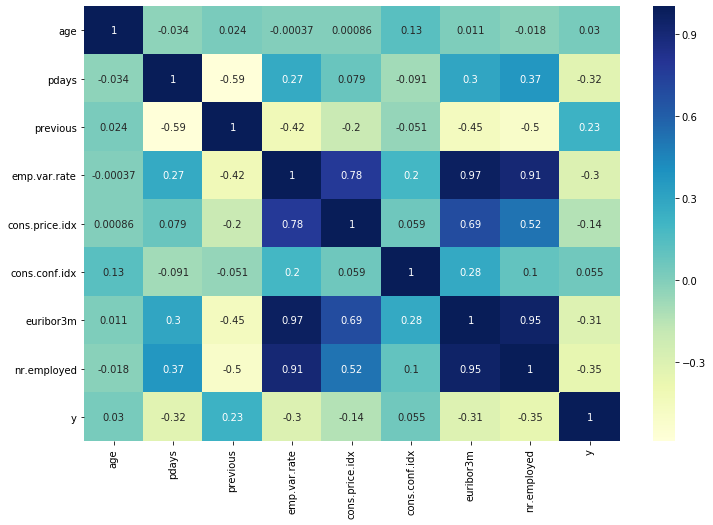

In [13]:
# ver correlaçao pearson
fig = plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

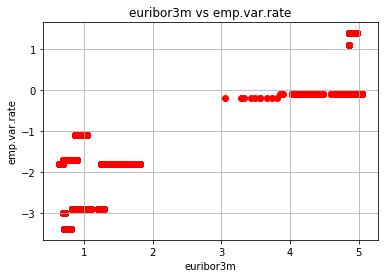

In [14]:
# vejamos o gráfico das 2 features mais relacionadas: euribor3m e emp.var.rate (0.97)
# note-se que também existe alta correlação (0.91) entre nr.employed e emp.var.rate, que desaparecerá no próximo passo

# emp.var.rate: employment variation rate - quarterly indicator
# euribor3m: euribor 3 month rate - daily indicator 

x = df['euribor3m']
y = df['emp.var.rate']

# plot 
plt.scatter(x, y, color='r', marker='o')
plt.xlabel('euribor3m')
plt.ylabel('emp.var.rate')
plt.title('euribor3m vs emp.var.rate')
plt.grid()
plt.show()

In [8]:
# Como euribor3m e emp.var.rate tem uma correlação de 0.97 uma delas deve ser eliminada.
# Será eliminada a variável que tiver menos correlação com a target Y, ou seja, será eliminada a emp.var.rate
# com isto também se elimina a alta correlação entre nr.employed e emp.var.rate

print('Antes de eliminar a coluna:', df.shape)

drop_cols = ['emp.var.rate']
df = df.drop(drop_cols, axis=1)

print('Depois de eliminar a coluna:', df.shape)

Antes de eliminar a coluna: (41188, 16)
Depois de eliminar a coluna: (41188, 15)


## C) Análise e Transformação das variáveis numéricas:
    * cons.conf.idx - Transformação em numérico positivo
    * age - tratamento de Outliers
    * pdays - transformação em binário
    * previous - transformação em binário
    * euribor3m, nr.employed, cons.price.idx  - não realizar qualquer tratamento
   

### C.1) Variável cons.conf.idx: transformação para variável numérica positiva de forma a melhor normalização

In [62]:
# valores negativos e positivos
df['cons.conf.idx'].sort_values().unique()

array([-50.8, -50. , -49.5, -47.1, -46.2, -45.9, -42.7, -42. , -41.8,
       -40.8, -40.4, -40.3, -40. , -39.8, -38.3, -37.5, -36.4, -36.1,
       -34.8, -34.6, -33.6, -33. , -31.4, -30.1, -29.8, -26.9])

In [63]:
# minimo da variável em valor absoluto
abs_min_cons_conf_idx = abs(df['cons.conf.idx'].min())
abs_min_cons_conf_idx

50.8

In [64]:
# somar a cada valor da variável o absoluto do valor minimo por forma a iniciar tudo a zero
df['cons.conf.idx'] = df['cons.conf.idx']  + abs_min_cons_conf_idx

In [65]:
# variável somente com valores positivos, shiftados á direita
df['cons.conf.idx'].sort_values().unique()

array([ 0. ,  0.8,  1.3,  3.7,  4.6,  4.9,  8.1,  8.8,  9. , 10. , 10.4,
       10.5, 10.8, 11. , 12.5, 13.3, 14.4, 14.7, 16. , 16.2, 17.2, 17.8,
       19.4, 20.7, 21. , 23.9])

Nota: por acaso testei os modelos com esta variável, com e sem transformação, o resultado foi o mesmo. Provavelmente o processo de normalização dos dados, mais à frente, ultrapassa esta dificuldade. 

### C.2) Variável age: remoção de outliers

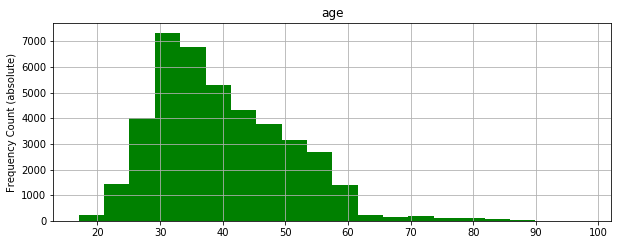

In [9]:
# Histograma com distribuição dos dados
plt.figure(figsize=(10, 8))

# The histogram 1
plt.subplot(2, 1, 1)
plt.title('age')
plt.hist(df.age, 20, density=False, facecolor='g')
plt.ylabel('Frequency Count (absolute)')
plt.grid()

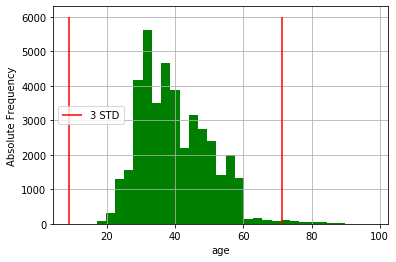

In [10]:
# aproximação de normal, aplicação de técnica de:
# 3 std above mean of age
xmin = df.age.mean() - df.age.std() * 3
xmax = df.age.mean() + df.age.std() * 3
data__= df.query('age < @xmin or age > @xmax')

df['age'].hist(bins=30, color='g')
plt.vlines([xmin,xmax], 0, 6000, colors='r', label='3 STD')
plt.xlabel('age')
plt.ylabel('Absolute Frequency')
plt.legend(loc=6)
plt.show()

In [11]:
data__= df.query('age < @xmin or age > @xmax')
df.drop(data__.index, inplace= True)

# formato do dataframe após eliminar  registos de outliers age
df.shape

(40819, 15)

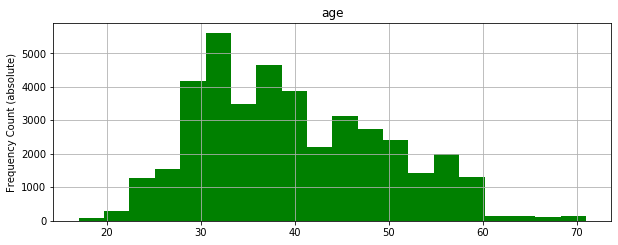

In [12]:
# gráfico final sem os outliers

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title('age')
plt.hist(df.age, 20, density=False, facecolor='g')
plt.ylabel('Frequency Count (absolute)')
plt.grid()

### C.3) Variável pdays: transformação em binário 0/1
    * pdays: number of days that passed by after the client was last contacted from a previous campaign 

In [13]:
# valores únicos de pdays
df.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

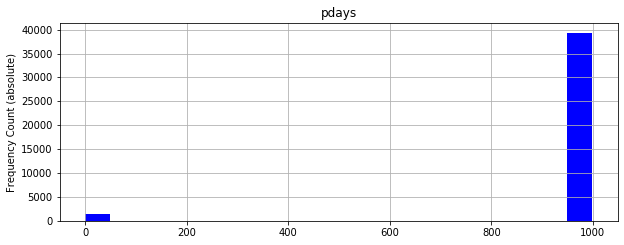

In [14]:
# Histograma com distribuição dos dados
plt.figure(figsize=(10, 8))

# The histogram 1
plt.subplot(2, 1, 1)
plt.title('pdays')
plt.hist(df.pdays, 20, density=False, facecolor='b')
plt.ylabel('Frequency Count (absolute)')
plt.grid()

#### Parece-me sensato transformar a variável em zero no caso de ainda não ter sido contactado (pdays=999) e um no caso de o já ter sido (pdays<>999).

In [15]:
# Convert pdays into binary feature
# maioria dos clientes não teve contacto (recente) para outras campanhas (pdays=999)
# assim, a variável pdays passa a ter a definição do género: "cliente contactado na última campanha"
# com o respectivo valor 0 se não foi (caso em que pdays=999) e 1 se foi contactado (pdays = todos os outros valores)

df.loc[df["pdays"]!=999, "pdays"]=1
df.loc[df["pdays"]==999, "pdays"]=0


In [16]:
# valores únicos de pdays, agora somente dois valores binários
df.pdays.unique()

array([0, 1], dtype=int64)

### C.4) Variável previous: transformação em binário 0/1
    * previous: number of contacts performed before this campaign and for this client 

In [17]:
df.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

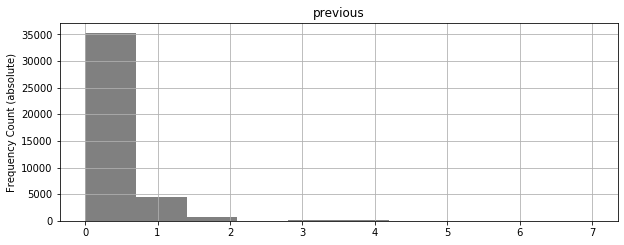

In [18]:
# Histograma com distribuição dos dados
plt.figure(figsize=(10, 8))

# The histogram 1
plt.subplot(2, 1, 1)
plt.title('previous')
plt.hist(df.previous, 10, density=False, facecolor='gray')
plt.ylabel('Frequency Count (absolute)')
plt.grid()

#### A maior parte dos clientes não foi contactado. 
#### Assim, vou transformar a variável em zero no caso de ainda não ter sido contactado (previous=0) e em um no caso de o já ter sido uma vez ou mais (previous>=1).

In [19]:
# Convert previous into binary feature
# maioria dos clientes não teve contacto 
# assim, a variável previous passa a ter a definição do género: "cliente contactado S/N"
# com o respectivo valor 0 se não foi (caso em que previous=0) e 1 se foi contactado (previous >= 1 )

#df.loc[df["previous"]==0, "previous"]=0
df.loc[df["previous"]!=0, "previous"]=1


In [20]:
# valores únicos de previous, agora somente dois valores binários
df.pdays.unique()

array([0, 1], dtype=int64)

### C.5) Variável cons.price.idx : não alterar


In [21]:
# valores unicos ordenados
df['cons.price.idx'].sort_values().unique()

array([92.201, 92.379, 92.431, 92.469, 92.649, 92.713, 92.756, 92.843,
       92.893, 92.963, 93.075, 93.2  , 93.369, 93.444, 93.749, 93.798,
       93.876, 93.918, 93.994, 94.027, 94.055, 94.199, 94.215, 94.465,
       94.601, 94.767])

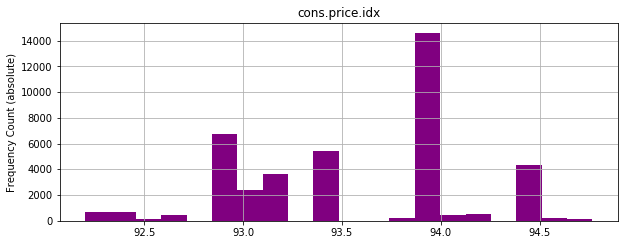

In [22]:
# Histograma com distribuição dos dados
plt.figure(figsize=(10, 8))

# The histogram 1
plt.subplot(2, 1, 1)
plt.title('cons.price.idx')
plt.hist(df['cons.price.idx'], 20, density=False, facecolor='purple')
plt.ylabel('Frequency Count (absolute)')
plt.grid()

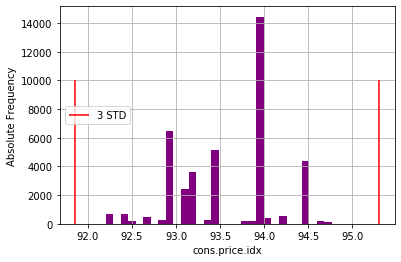

In [23]:
# aproximação de normal, aplicação de técnica de:
# 3 std above mean of cons.conf.idx
xmin = df['cons.price.idx'].mean() - df['cons.price.idx'].std() * 3
xmax = df['cons.price.idx'].mean() + df['cons.price.idx'].std() * 3
var1 = df['cons.price.idx']

data__= df.query('@var1 < @xmin or @var1 > @xmax')

df['cons.price.idx'].hist(bins=30, color='purple')
plt.vlines([xmin,xmax], 0, 10000, colors='r', label='3 STD')
plt.xlabel('cons.price.idx')
plt.ylabel('Absolute Frequency')
plt.legend(loc=6)
plt.show()

In [24]:
# não existe nada para além dos limites criados, ou seja, não existem outliers
data__

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


#### Não existe nada para além dos limites criados, ou seja, não existem outliers

### C.6) Variável euribor3m : não alterar

In [25]:
# valores unicos ordenados
df['euribor3m'].sort_values().unique()

array([0.634, 0.635, 0.636, 0.637, 0.638, 0.639, 0.64 , 0.642, 0.643,
       0.644, 0.645, 0.646, 0.649, 0.65 , 0.651, 0.652, 0.653, 0.654,
       0.655, 0.659, 0.663, 0.668, 0.672, 0.677, 0.682, 0.683, 0.684,
       0.685, 0.688, 0.69 , 0.692, 0.695, 0.697, 0.699, 0.7  , 0.701,
       0.702, 0.704, 0.706, 0.707, 0.708, 0.709, 0.71 , 0.711, 0.712,
       0.713, 0.714, 0.715, 0.716, 0.717, 0.718, 0.719, 0.72 , 0.721,
       0.722, 0.723, 0.724, 0.727, 0.728, 0.729, 0.73 , 0.731, 0.732,
       0.733, 0.735, 0.737, 0.739, 0.74 , 0.741, 0.742, 0.743, 0.744,
       0.748, 0.749, 0.75 , 0.752, 0.753, 0.754, 0.755, 0.761, 0.762,
       0.766, 0.767, 0.768, 0.77 , 0.771, 0.773, 0.778, 0.781, 0.782,
       0.788, 0.79 , 0.793, 0.797, 0.802, 0.803, 0.809, 0.81 , 0.813,
       0.819, 0.821, 0.822, 0.825, 0.827, 0.829, 0.834, 0.835, 0.838,
       0.84 , 0.843, 0.846, 0.849, 0.851, 0.854, 0.859, 0.861, 0.869,
       0.87 , 0.873, 0.876, 0.877, 0.878, 0.879, 0.88 , 0.881, 0.882,
       0.883, 0.884,

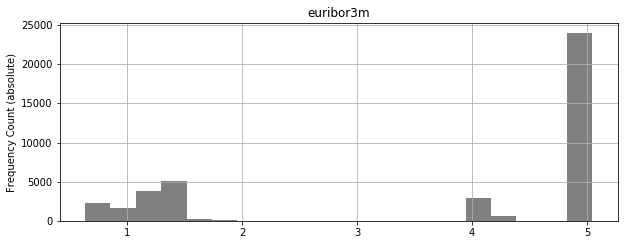

In [26]:
# Histograma com distribuição dos dados
plt.figure(figsize=(10, 8))

# The histogram 1
plt.subplot(2, 1, 1)
plt.title('euribor3m')
plt.hist(df['euribor3m'], 20, density=False, facecolor='gray')
plt.ylabel('Frequency Count (absolute)')
plt.grid()

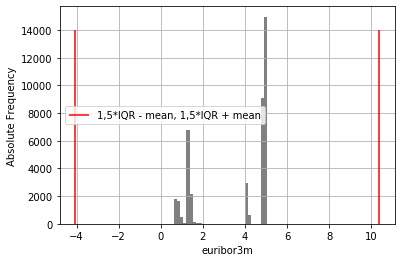

In [27]:
# técnica 1,5*IQR - mean, 1,5*IQR + mean pelo facto dos dados não se aproximarem de curva normal
# histograma com barras laterais a vermelho demarcando os limites de dados a excluir
lowerbound,upperbound = outlier_treatment(df.euribor3m)

df['euribor3m'].hist(bins=30, color='gray')
plt.vlines([lowerbound,upperbound], 0, 14000, colors='r', label='1,5*IQR - mean, 1,5*IQR + mean')
plt.xlabel('euribor3m')
plt.ylabel('Absolute Frequency')
plt.legend(loc=6)
plt.show()

#### Não existe nada para além dos limites criados, ou seja, não existem outliers

### C.7) Variável nr.employed : não alterar

In [28]:
# valores unicos ordenados
df['nr.employed'].sort_values().unique()

array([4963.6, 4991.6, 5008.7, 5017.5, 5023.5, 5076.2, 5099.1, 5176.3,
       5191. , 5195.8, 5228.1])

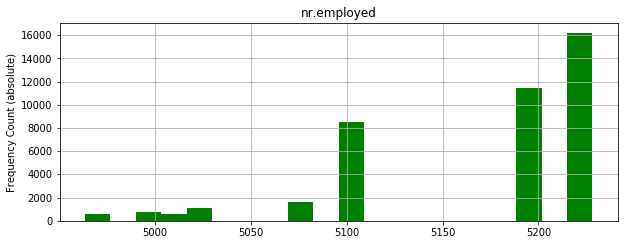

In [29]:
# Histograma com distribuição dos dados
plt.figure(figsize=(10, 8))

# The histogram 1
plt.subplot(2, 1, 1)
plt.title('nr.employed')
plt.hist(df['nr.employed'], 20, density=False, facecolor='green')
plt.ylabel('Frequency Count (absolute)')
plt.grid()

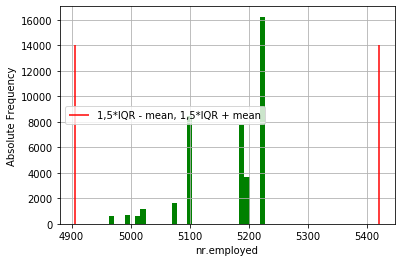

In [30]:
# histograma com barras laterais a vermelho demarcando os limites de dados a excluir
lowerbound,upperbound = outlier_treatment(df['nr.employed'])

df['nr.employed'].hist(bins=30, color='green')
plt.vlines([lowerbound,upperbound], 0, 14000, colors='r', label='1,5*IQR - mean, 1,5*IQR + mean')
plt.xlabel('nr.employed')
plt.ylabel('Absolute Frequency')
plt.legend(loc=6)
plt.show()

#### Não existe nada para além dos limites criados, ou seja, não existem outliers

## D) Análise e Transformação da variáveis categóricas:
    * education - numeric transform 
    * job - numeric transform with ohe
    * marital - numeric transform 
    * default - binary transform
    * housing - binary transform
    * loan - binary transform
    * poutcome - numeric transform   
        

In [31]:
# estatísticas das variáveis categóricas
df.describe(include='object')

,job,marital,education,default,housing,loan,poutcome
count,40819,40819,40819,40819,40819,40819,40819
unique,12,4,8,3,3,3,3
top,admin.,married,university.degree,no,yes,no,nonexistent
freq,10420,24690,12122,32258,21374,33648,35358


### D.1) Variável education - numeric transform 

In [32]:
# valores unicos categóricos ordenados
df['education'].sort_values().unique()

array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype=object)

In [33]:
# atribuição de valores numéricos de acordo com ascensão de educação, transformando a variável categórica em numérica
#'unknown', 'illiterate' = 0
#'basic.4y' = 1
#'basic.6y'=2
#'basic.9y'=3    
#'high.school'=4
#'professional.course'=5
#'university.degree'=6

##------transform categorical to numeric discrete-----------
df.loc[df["education"] == "unknown", "education"] = 0
df.loc[df["education"] == "illiterate", "education"] = 0
df.loc[df["education"] == "basic.4y", "education"] = 1
df.loc[df["education"] == "basic.6y", "education"] = 2
df.loc[df["education"] == "basic.9y", "education"] = 3
df.loc[df["education"] == "high.school", "education"] = 4
df.loc[df["education"] == "professional.course", "education"] = 5
df.loc[df["education"] == "university.degree", "education"] = 6


In [34]:
# valores unicos numéricos ordenados
df['education'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

### D.2) Variável job - numeric transform with OHE (one hot encoding)

In [35]:
# valores unicos ordenados
df['job'].sort_values().unique()

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [36]:
# agrupamento de dados por job com consequente soma dos valores de y
df2 = df.groupby(['job']).y.sum()
df2
# a maior parte dos empregos é administrador

job
admin.           1351
blue-collar       638
entrepreneur      124
housemaid          95
management        325
retired           273
self-employed     149
services          323
student           275
technician        730
unemployed        144
unknown            32
Name: y, dtype: int64

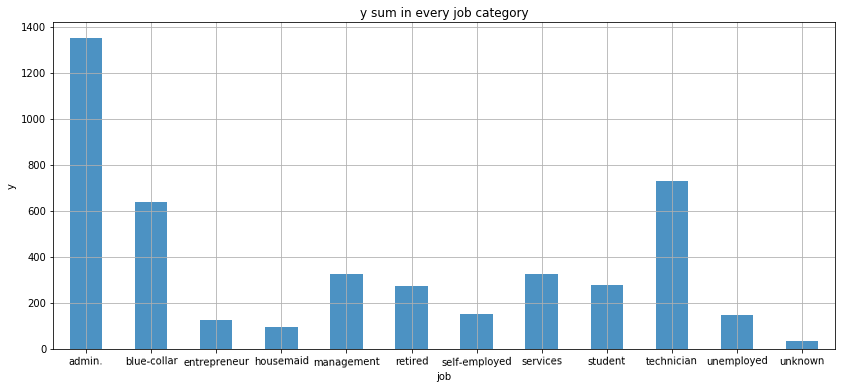

In [37]:
# amostragem gráfica das diferentes categorias de job face á target
plt.figure(figsize=(14, 6))
df2.plot(kind='bar', align='center', alpha=0.8, rot=True)
plt.title('y sum in every job category')
plt.xlabel('job')
plt.ylabel('y')
plt.grid()

In [38]:
#--------------Method OHE-------------
# Criará 12 colunas pois são 12 diferentes tipos de job. cada uma delas terá 0 e 1 conforme a presença da característica nos dados
# este método é usado pois estas variáveis categóricas não se conseguem categorizar em numnéricas pois não existe um tipo de trabalho superior a outro, 
# como acontecia com a educação

df_job_ohe = pd.get_dummies(df.job, prefix='job_')
df = pd.concat([df, df_job_ohe], axis=1)

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,...,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,job__unknown
0,56,housemaid,married,1,no,no,no,0,0,nonexistent,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,4,unknown,no,no,0,0,nonexistent,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,4,no,yes,no,0,0,nonexistent,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,2,no,no,no,0,0,nonexistent,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,4,no,no,yes,0,0,nonexistent,...,0,0,0,0,0,1,0,0,0,0


In [40]:
df.shape

(40819, 27)

### D.3) Variável marital - numeric transform 

In [41]:
# valores unicos ordenados
df['marital'].sort_values().unique()

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [42]:
# agrupamento de dados por job com consequente soma dos valores de y
df2 = df.groupby(['marital']).y.sum()
df2

marital
divorced     416
married     2415
single      1616
unknown       12
Name: y, dtype: int64

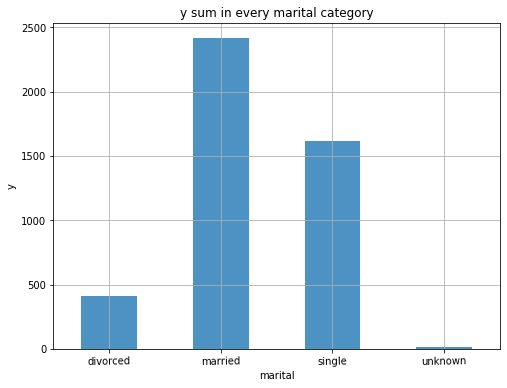

In [43]:
# amostragem gráfica das diferentes categorias de job face á target
plt.figure(figsize=(8, 6))
df2.plot(kind='bar', align='center', alpha=0.8, rot=True)
plt.title('y sum in every marital category')
plt.xlabel('marital')
plt.ylabel('y')
plt.grid()

In [44]:
 ##------transform categorical to numeric discrete-----------
df.loc[df["marital"] == "unknown", "marital"] = 0
df.loc[df["marital"] == "single", "marital"] = 1
df.loc[df["marital"] == "married", "marital"] = 2
df.loc[df["marital"] == "divorced", "marital"] = 3


In [45]:
# valores unicos ordenados
df['marital'].sort_values().unique()

array([0, 1, 2, 3], dtype=int64)

### D.4) Variáveis default, housing, loan - binary transform 

In [46]:
# valores unicos ordenados todos iguais nas 3 variáveis
# df['default'].sort_values().unique()
# df['housing'].sort_values().unique()
df['loan'].sort_values().unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [47]:
##------transform categorical to binary-----------
# transformar a variável em um e zero
columns=['default','housing','loan']

for x in columns:    
    df.loc[df[x] == "unknown", x] = 0
    df.loc[df[x] == "no", x] = 0
    df.loc[df[x] == "yes", x] = 1


In [48]:
# valores unicos ordenados todos iguais nas 3 variáveis
# df['default'].sort_values().unique()
# df['housing'].sort_values().unique()
df['default'].sort_values().unique()

array([0, 1], dtype=int64)

### D.5) Variável poutcome - numeric transform 


In [49]:
# valores unicos ordenados
df['poutcome'].sort_values().unique()

array(['failure', 'nonexistent', 'success'], dtype=object)

In [50]:
##------transform categorical to numeric discrete-----------
# vou catalogar na ordem crescente de sucesso em campanha anterior, sendo o zero a não existencia, 1 resultado negativo e 2 positivo
df.loc[df["poutcome"] == "nonexistent", "poutcome"] = 0
df.loc[df["poutcome"] == "failure", "poutcome"] = 1
df.loc[df["poutcome"] == "success", "poutcome"] = 2

In [51]:
# valores unicos ordenados
df['poutcome'].sort_values().unique()

array([0, 1, 2], dtype=int64)

## E) Divisão do dataset em treino e teste
  

In [66]:
# Let's only use the numeric attributes
df_numeric = df.select_dtypes(exclude='object')
df_numeric.head()

,age,marital,education,default,housing,loan,pdays,previous,poutcome,cons.price.idx,...,job__entrepreneur,job__housemaid,job__management,job__retired,job__self-employed,job__services,job__student,job__technician,job__unemployed,job__unknown
0,56,2,1,0,0,0,0,0,0,93.994,...,0,1,0,0,0,0,0,0,0,0
1,57,2,4,0,0,0,0,0,0,93.994,...,0,0,0,0,0,1,0,0,0,0
2,37,2,4,0,1,0,0,0,0,93.994,...,0,0,0,0,0,1,0,0,0,0
3,40,2,2,0,0,0,0,0,0,93.994,...,0,0,0,0,0,0,0,0,0,0
4,56,2,4,0,0,1,0,0,0,93.994,...,0,0,0,0,0,1,0,0,0,0


In [67]:
# repartir dataset em teste e treino
train_set, test_set = train_test_split(df_numeric, test_size = 0.2, random_state = seed)

X_train = train_set.drop(['y'], axis = 1)
y_train = train_set['y']

X_test = test_set.drop(['y'], axis = 1)
y_test = test_set['y']

## F) Baseline da campanha
* Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    * y=0 (não adere) mas modelo previu y=1 --> FP tem custo de 500 € 

* Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.
    * Se y=1 (aderiu) mas modelo previu y=0 --> FN tem custo de 2000 €

* Se se parte do principio que todos os clientes vão aderir à campanha (y=1), o custo estará se o meu modelo se enganar e prever que não adere à partida ou seja, o modelo previa y=0 mas resultou em y=1 (FN). E para esta questão, o custo de cada FN é de 2000 €.


In [68]:
# resultado previsto da campanha, colocando todas as previsões a zeros, de forma a estudar os FN do modelo, 
# acreditando que todos os clientes aceitarão participar
y_preds_all_bad = np.zeros(y_test.shape)

In [69]:
# matriz de confusão
tn, fp, fn, tp  = confusion_matrix(y_test, y_preds_all_bad).ravel()    
print(tn, fp, fn, tp)

7301 0 863 0


In [70]:
# custo que teria se todos aderissem à campanha (y real =1, y previsto = 0)
print('total cost:', fn*2000)

total cost: 1726000


### Baseline com custo associado da campanha de 1726000 €

### F.1) Alguns indicadores das previsões sem modelo (tudo a zero)

Precision: 0.0000
Recall: 0.0000
Classification Report :

               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7301
           1       0.00      0.00      0.00       863

    accuracy                           0.89      8164
   macro avg       0.45      0.50      0.47      8164
weighted avg       0.80      0.89      0.84      8164

ROC AUC:  0.5 




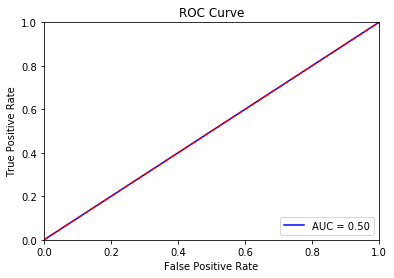

In [71]:
## Precision
print("Precision: %0.4f" % precision_score(y_test, y_preds_all_bad))

## Recall score
print("Recall: %0.4f" % recall_score(y_test, y_preds_all_bad))

## Print classification report
print("Classification Report :\n\n",classification_report(y_test, y_preds_all_bad))

## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, y_preds_all_bad)
roc_auc = auc(fp, tp)
print("ROC AUC: ", round(roc_auc,2),"\n\n")

## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Conclusão: ROC a 50%, típica de um sistema sem aprendizagem

## G) Normalização dos dados

In [72]:
# normalizacao
scaler = MinMaxScaler()

columns_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns_names)

## H) Obter melhores hiper-parâmetros para os modelos
## Atenção: processo demora horas na alínea c) modelo SVM

In [73]:
# função para obter os melhores parâmetros para cada modelo
def bestparameters(m, p, X_train, y_train, X_test, y_test):    
    # faz o cross validation 5 vezes, k=5, com os valores de 0.001 a 1000 
    clf = GridSearchCV(m, p, cv=5).fit(X_train, y_train)

    # melhor valor de C e penalty
    print('Best Estimator: ', clf.best_estimator_)

    # accuracy no TREINO
    # se houver overfit os dados do treino serão superiores aos do test, ou seja o best_score é maior que o accuracy_score
    print('Best Score: ',clf.best_score_)

    #previsão
    y_preds = clf.predict(X_test)

    # accuracy no test/previsão
    print('Accuracy Score: ', accuracy_score(y_test, y_preds))

    # melhores hiperparâmetros a utilizar no modelo
    print('Best Parameters: ', clf.best_params_)
    print('---------------------------------------------------------\n')
    return;

#### A) LogisticRegression

In [74]:
# definir o modelo a utilizar, não faço o fit
m = LogisticRegression(random_state = seed, max_iter = 200)

# definir hiperparâmetros do modelo para testar e verificar o melhor: C e penalty - regularizaçao L1 e L2
p = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test);
print('---------------------------------------------------------\n')


Best Estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score:  0.9009646302250803
Accuracy Score:  0.9048260656540912
Best Parameters:  {'C': 0.1, 'penalty': 'l1'}
---------------------------------------------------------

Wall time: 23.4 s
---------------------------------------------------------



#### B) KNeighborsClassifier

In [79]:
# definir o modelo a utilizar, não faço o fit
m = KNeighborsClassifier()

# definir hiperparâmetros do modelo para testar e verificar o melhor: n_neighbors
p = {'n_neighbors': range(1, 100, 10)}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test)
print('---------------------------------------------------------\n')


Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=51, p=2,
                     weights='uniform')
Best Score:  0.8996172102281427
Accuracy Score:  0.903233708966193
Best Parameters:  {'n_neighbors': 51}
---------------------------------------------------------

Wall time: 6min 15s
---------------------------------------------------------------------------------------



#### C) SVM

In [96]:
# definir o modelo a utilizar, não faço o fit
m = SVC(random_state=seed)

# definir hiperparâmetros do modelo para testar e verificar o melhor: C, tipo Kernel e lambda
#p = {'C': [0.01, 0.1, 1], 'kernel': ('linear', 'rbf'), 'gamma': np.logspace(-3, 3, 10)} ---> deu c=1, em 3h 10min 30s
#Best Score:  0.9005971520440974
#Accuracy Score:  0.9034786869181773
# Best Parameters:  {'C': 1, 'gamma': 0.46415888336127775, 'kernel': 'rbf'}

p = {'C': [1,2,4], 'kernel': ('linear', 'rbf'), 'gamma': np.logspace(-3, 3, 10)}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test)
print('---------------------------------------------------------\n')


Best Estimator:  SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Best Score:  0.9008115143163374
Accuracy Score:  0.903233708966193
Best Parameters:  {'C': 4, 'gamma': 0.1, 'kernel': 'rbf'}
---------------------------------------------------------

Wall time: 4h 45min 42s
---------------------------------------------------------



#### D) DecisionTreeClassifier

In [90]:
# definir o modelo a utilizar, não faço o fit
m = tree.DecisionTreeClassifier(random_state = seed)

# definir hiperparâmetros do modelo para testar e verificar o melhor: max_depth e min_samples_split
p = {'max_depth': [3,4,5,6,7], 'min_samples_split': [ 2, 4, 10], 'random_state': [0, 1]}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test)
print('---------------------------------------------------------\n')


Best Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')
Best Score:  0.901362731587812
Accuracy Score:  0.9050710436060755
Best Parameters:  {'max_depth': 4, 'min_samples_split': 2, 'random_state': 1}
---------------------------------------------------------

Wall time: 7.52 s
---------------------------------------------------------



#### E) RandomForestClassifier

In [83]:
# definir o modelo a utilizar, não faço o fit
m = RandomForestClassifier(random_state = seed)

# definir hiperparâmetros do modelo para testar e verificar o melhor: n_estimators
p = {'max_depth': [3,4,5,6], 'n_estimators': [8, 9, 10, 11], 'random_state': [0, 1]}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test)
print('---------------------------------------------------------\n')


Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Best Score:  0.9014852243148063
Accuracy Score:  0.9043361097501225
Best Parameters:  {'max_depth': 5, 'n_estimators': 10, 'random_state': 0}
---------------------------------------------------------

Wall time: 15.1 s
---------------------------------------------------------



#### F) MLPClassifier

In [85]:
# definir o modelo a utilizar, não faço o fit
m = MLPClassifier(random_state = seed, max_iter = 10000)

# definir hiperparâmetros do modelo para testar e verificar o melhor: 
p = {'hidden_layer_sizes': [(7), (7, 2), (7, 3, 2), (10), (10, 2), (10,3,2), (12)], 'learning_rate_init': [0.001, 0.01, 0.1, 1]}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test)
print('---------------------------------------------------------\n')


Best Estimator:  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.1, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Best Score:  0.900474659317103
Accuracy Score:  0.9038461538461539
Best Parameters:  {'hidden_layer_sizes': 10, 'learning_rate_init': 0.1}
---------------------------------------------------------

Wall time: 4min 18s
---------------------------------------------------------



#### G) Perceptron

In [77]:
# definir o modelo a utilizar, não faço o fit
m = Perceptron(random_state = seed, max_iter = 10000)

# definir hiperparâmetros do modelo para testar e verificar o melhor: 
p = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'validation_fraction': [0.001,0.99]}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test)
print('---------------------------------------------------------\n')


Best Estimator:  Perceptron(alpha=0.1, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=10000, n_iter_no_change=5, n_jobs=None,
           penalty='l1', random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.001, verbose=0, warm_start=False)
Best Score:  0.889879038432093
Accuracy Score:  0.8942920137187653
Best Parameters:  {'alpha': 0.1, 'penalty': 'l1', 'validation_fraction': 0.001}
---------------------------------------------------------

Wall time: 6.85 s
---------------------------------------------------------



#### H) Gaussian Naive Bayes

In [86]:
# definir o modelo a utilizar, não faço o fit
m = GaussianNB()

# definir hiperparâmetros do modelo para testar e verificar o melhor: 
p = {'var_smoothing': np.logspace(-1, 1e-09, 1)}

# executo a função
%time bestparameters(m, p, X_train, y_train, X_test, y_test)
print('---------------------------------------------------------\n')


Best Estimator:  GaussianNB(priors=None, var_smoothing=0.1)
Best Score:  0.8575409585055888
Accuracy Score:  0.8593826555609995
Best Parameters:  {'var_smoothing': 0.1}
---------------------------------------------------------

Wall time: 309 ms
---------------------------------------------------------



## I) Implementação de modelos de Machine Learning
    * Estamos perante um problema de classificação supervisionada ou seja existe uma target que necessita de previsão e cujo resultado será sempre zero ou um, após ter sido transformado de 'no' ou 'yes'. 
    * Hiper-parâmetros calculados na alínea anterior
    * Para cada um dos modelos vai ser calculado, sendo o total cost o que interessa pois trata-se de dinheiro a investir:
        * Score (test)
        * Accuracy score (test/prediction)
        * Matrix confusion [TN FP FN TP]
        * total cost (fn*2000 + fp*500)

In [59]:
# criação do modelo e aprendizagem no set de treino

%time modelo_Perceptron = Perceptron(random_state = seed, max_iter = 10000, alpha=0.1, penalty='l1', validation_fraction= 0.001).fit(X_train, y_train)
%time modelo_LogisticRegression = LogisticRegression(random_state = seed, max_iter = 200, C=0.1, penalty='l1').fit(X_train, y_train)
%time modelo_RandomForestClassifier = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0).fit(X_train, y_train)
%time modelo_SVC = SVC(C=4, gamma= 0.1, kernel='rbf').fit(X_train, y_train)
%time modelo_GaussianNB = GaussianNB(var_smoothing = 0.1).fit(X_train, y_train)
%time modelo_KNeighborsClassifier = KNeighborsClassifier(n_neighbors = 51).fit(X_train, y_train)
%time modelo_MLPClassifier = MLPClassifier(random_state = seed, max_iter = 10000, hidden_layer_sizes= 10, learning_rate_init= 0.1).fit(X_train, y_train)
%time modelo_DecisionTreeClassifier = tree.DecisionTreeClassifier(random_state = 1, max_depth = 4, min_samples_split = 2).fit(X_train, y_train)
%time modelo_DecisionTreeClassifier_V2 = tree.DecisionTreeClassifier(random_state = 1, max_depth = 7, min_samples_split = 2).fit(X_train, y_train)

modelos = [[modelo_Perceptron, 'modelo_NeuralNetworks'],[modelo_LogisticRegression, 'modelo_LogisticRegression'],
           [modelo_RandomForestClassifier, 'modelo_RandomForestClassifier'],
           [modelo_SVC, 'SVC'], [modelo_GaussianNB, 'modelo_GaussianNB'], [modelo_KNeighborsClassifier, 'modelo_KNeighborsClassifier'],           
           [modelo_MLPClassifier, 'modelo_MLPClassifier'], [modelo_DecisionTreeClassifier, 'modelo_DecisionTreeClassifier'],
           [modelo_DecisionTreeClassifier_V2, 'modelo_DecisionTreeClassifier_V2']]

for x,y in modelos:    
    print('------------------------------------------------------------')
    print('   Machine Learning : ', y)
    print('------------------------------------------------------------')    
    #score do modelo aplicado ao set de test
    print('Score (test):',x.score(X_test, y_test))

    # Previsão
    y_preds = x.predict(X_test)
    print('Accuracy score (test/prediction):',accuracy_score(y_test, y_preds))

    # confusion matrix
    tn, fp, fn, tp  = confusion_matrix(y_test, y_preds).ravel()   
    print('Matrix confusion [TN FP FN TP];', tn, fp, fn, tp)
    print('total cost (fn*2000 + fp*500):', fn*2000 + fp*500, '\n\n')

Wall time: 85 ms
Wall time: 262 ms
Wall time: 136 ms
Wall time: 57.1 s
Wall time: 28 ms
Wall time: 815 ms
Wall time: 1.74 s
Wall time: 44 ms
Wall time: 69 ms
------------------------------------------------------------
   Machine Learning :  modelo_NeuralNetworks
------------------------------------------------------------
Score (test): 0.8942920137187653
Accuracy score (test/prediction): 0.8942920137187653
Matrix confusion [TN FP FN TP]; 7301 0 863 0
total cost (fn*2000 + fp*500): 1726000 


------------------------------------------------------------
   Machine Learning :  modelo_LogisticRegression
------------------------------------------------------------
Score (test): 0.9048260656540912
Accuracy score (test/prediction): 0.9048260656540912
Matrix confusion [TN FP FN TP]; 7244 57 720 143
total cost (fn*2000 + fp*500): 1468500 


------------------------------------------------------------
   Machine Learning :  modelo_RandomForestClassifier
-----------------------------------------

### <b>Valor do melhor modelo de Machine Learning, com base no custo associado, é o DecisionTreeClassifier_V2 com um custo para o banco de 1383500 €, com os seguintes parâmetros:</b>
    * random_state = 1, 
    * max_depth = 7, 
    * min_samples_split = 2

### <b>Utilizando este modelo consegue-se uma poupança, face à Baseline inicial, de:</b>
### <b>1726000 - 1383500 = 342500 € </b>

### I.1) Vejamos agora alguns indicadores das previsões para este modelo:
    A última previsão que ficou do ciclo anterior é do modelo DecisionTreeClassifier_V2, o que tem o melhor valor de custo mínimo para a campanha. Será este que será analisado agora com alguns indicadores.

Precision: 0.5703
Recall: 0.2445
Classification Report :

               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7301
           1       0.57      0.24      0.34       863

    accuracy                           0.90      8164
   macro avg       0.74      0.61      0.64      8164
weighted avg       0.88      0.90      0.88      8164

ROC AUC:  0.61 




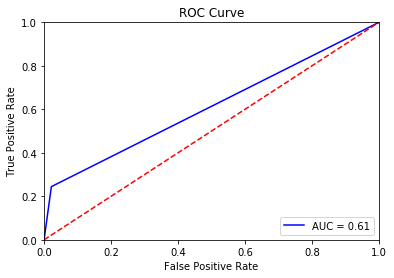

In [75]:
# DecisionTreeClassifier_V2: random_state = 1, max_depth = 7, min_samples_split = 2 


## Precision
print("Precision: %0.4f" % precision_score(y_test, y_preds))

## Recall score
print("Recall: %0.4f" % recall_score(y_test, y_preds))

## Print classification report
print("Classification Report :\n\n",classification_report(y_test, y_preds))

## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, y_preds)
roc_auc = auc(fp, tp)
print("ROC AUC: ", round(roc_auc,2),"\n\n")

## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

AUC a 61% (Curva ROC), demonstrando aprendizagem distanciando-se da linha vermelha inicial.
A taxa de True Positive é mais alta face à taxa de False Positive, isto é, o modelo enganou-se menos na previsão de quem acederia à campanha e portanto diminuiu os custos para o banco.

### I.2) Vejamos agora a árvore de decisão criada pelo modelo, em ficheiro anexo BankCampaign.png

In [111]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

# modelo final
modelo_final = tree.DecisionTreeClassifier(random_state = 1, max_depth = 7, min_samples_split = 2).fit(X_train, y_train)


# ---------------------------------  método 1 que não consegui por a funcionar neste meu computador.... ------------------------
#dot_data = StringIO()
#export_graphviz(modelo_final, out_file = dot_data, filled = True, rounded = True, special_characters = True, 
#                feature_names = X_train.columns, class_names = ['0', '1'] )

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('bankCampaign.png')
#Image(graph.create_png())


# ----------------------------------- método 2 : crio ficheiro *.dot e no windows edito o mesmo com Grapviz e gravo como *.png--
# criar imagem com arvore de decisões 
# visualize tree on *.dot
tree.export_graphviz(modelo_final, feature_names = X_train.columns, class_names = ['0', '1'] ,  out_file = "BankCampaign.dot")

#no windows: usar a ferramenta Grapviz para converter *.dot em *.png e gravar ficheiro
# Graph >> Settings >> Ok
# ficheiro BankCampaign.png em anexo


c:\users\teste\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### I.3) Vejamos agora as principais variáveis a ter em conta neste modelo

In [94]:
# modelo final
modelo_final = tree.DecisionTreeClassifier(random_state = 1, max_depth = 7, min_samples_split = 2).fit(X_train, y_train)

# importância das variáveis
modelo_final.feature_importances_

array([5.23401384e-02, 2.14240485e-03, 1.45808786e-02, 0.00000000e+00,
       7.91799868e-04, 5.87343475e-03, 1.12465233e-01, 3.95824998e-03,
       7.33500801e-03, 1.72083947e-02, 5.90689875e-02, 9.89485044e-02,
       6.10277280e-01, 1.23210772e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.58386445e-03, 0.00000000e+00, 4.17299860e-03,
       0.00000000e+00, 3.54859920e-04, 1.33350158e-03, 2.06605602e-03,
       3.26629726e-03])

In [103]:
# importância das variáveis com nome de cada uma delas
# as mais importantes são: 'nr.employed' (0.61) , 'pdays' (0.11) e 'euribor3m' (0.098)
list(zip(X_train.columns, modelo_DecisionTreeClassifier_V2.feature_importances_))

[('age', 0.05234013843708277),
 ('marital', 0.0021424048459864633),
 ('education', 0.014580878562869314),
 ('default', 0.0),
 ('housing', 0.0007917998678645694),
 ('loan', 0.005873434751360224),
 ('pdays', 0.11246523329845318),
 ('previous', 0.003958249983795817),
 ('poutcome', 0.007335008012105701),
 ('cons.price.idx', 0.017208394678675267),
 ('cons.conf.idx', 0.059068987533101185),
 ('euribor3m', 0.09894850439413623),
 ('nr.employed', 0.6102772800777605),
 ('job__admin.', 0.0012321077248457013),
 ('job__blue-collar', 0.0),
 ('job__entrepreneur', 0.0),
 ('job__housemaid', 0.0),
 ('job__management', 0.00258386444995477),
 ('job__retired', 0.0),
 ('job__self-employed', 0.004172998598386217),
 ('job__services', 0.0),
 ('job__student', 0.00035485991993650253),
 ('job__technician', 0.0013335015817761667),
 ('job__unemployed', 0.0020660560239493934),
 ('job__unknown', 0.0032662972579599672)]

### As features mais relevantes são: <b> 'nr.employed' (0.61) , 'pdays' (0.11) e 'euribor3m' (0.098) </b>

### De facto, os indicadores do país têm tremenda importância!

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    4. Qual o algoritmo que levou aos melhores resultados?
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    6. Qual é o custo que o banco tem sem nenhum modelo?
    7. Qual o custo que o banco passa a ter com o vosso modelo?

### Respostas:
* 1. O dataset inicial tem 16 variáveis, sendo 15 features e 1 target variable (y). Tem 41188 clientes (registos).
* 2. Aderiram ao depósito a prazo apenas 4640 clientes, não aderiram 36548.
* 3. Após o teste de diversos modelos de Machine Learning, concluindo-se que o melhor seria o DecisionTreeClassifier, as principais features seleccionadas pelo mesmo foram:
    * <b>'nr.employed' (0.61)</b>, 
    * 'pdays' (0.11), 
    * 'euribor3m' (0.098)
    * 'cons.conf.idx' (0.059)
    * 'age' (0.052)
* 4. O algoritmo com melhores valores foi o <b>DecisionTreeClassifier</b> com os seguintes parâmetros:
    * <b>random_state = 1, max_depth = 7, min_samples_split = 2</b>
* 5. As métricas de avaliação para comparação dos modelos basearam-se no custo que ficaria com base no engano ou acerto do modelo, isto é, com base nos <b>FN e FP </b>da sua matriz de confusão. O modelo ideal teria de ter uma taxa de FP muito baixa e uma taxa de FN alta. O modelo seleccionado ficou-se com uma curva ROC, indicadora destas métricas, de 61%.
* 6. A <b>baseline</b> inicial, sem modelo algum e imaginando que todos os clientes iriam aceder à campanha, era de <b>1726000 €</b>. Nesta baseline não haveriam FP (as pessoas que se pensavam aderir à campanha de facto aderiram) mas poderiam existir FN (as pessoas que se pensavam não aderir à campanha acabaram por aderir, houve engano de previsão com custos associados)
* 7. Com o modelo seleccionado,  <b>DecisionTreeClassifier, o custo passa a ser de 1383500 € </b>, isto é, acarreta uma  <b>poupança ao banco de 342500 € </b> face ao previsto inicialmente sem modelo.
    

### Bibliografia:

##### A comparison of the Pearson and Spearman correlation methods
* https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/


##### 68–95–99.7 rule
* https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

##### matplotlib.pyplot.vlines
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html

##### Scikit Learn - 5.3. Preprocessing data
* https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

##### Matplotlib Tutorial
* https://www.tutorialspoint.com/matplotlib/index.htm

##### spines - matplotlib.spines
* https://matplotlib.org/2.1.0/api/spines_api.html

##### Data Cleaning and Preparation for Machine Learning
* https://www.dataquest.io/blog/machine-learning-preparing-data/

##### Accuracy Score ValueError: Can't Handle mix of binary and continuous target
* https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target#comment95711313_43945086

##### Toda a informação retirada das aulas de Machine Learning, principalmente os hiper-parâmetros de cada modelo de Machine Learning